# Dimensionality Reduction Notes

## Remaining Questions // Things to Look Into
* Is there a more space efficient way to store the expressions data than in the pandas dataframe oriented .csv it's currently in, or should we just compress it for the cloud and uncompress it when we're working with it?
* yes. these links: https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d, https://towardsdatascience.com/stop-persisting-pandas-data-frames-in-csvs-f369a6440af5, and https://analyticsindiamag.com/complete-guide-to-different-persisting-methods-in-pandas/. Seems like we should talk about these alternative formats as a group on Wednesday. 

* number of input variables (aka features)== dimensionality of dataset
* "Having a large number of dimensions in the feature space can mean that the volume of that space is very large, and in turn, the points that we have in that space (rows of data) often represent a small and non-representative sample. This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the 'curse of dimensionality.'"
* https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py 
* https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py  
* https://www.codegrepper.com/code-examples/python/pandas+set+first+row+as+column+names 


### PCA Attempt
* have the expressions been standardized or z-score normalized? Should make a couple plots of their values to see. If not, they should be scaled before PCA 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

tissues = np.array(pd.read_csv('https://raw.githubusercontent.com/HarritonResearchLab/genomics/main/src/exploring/gene_knn/first_try/data/tissue_df.csv')['tissue_name'])

## Convert expressions dataframe 
* First to columns of gene names, then convert df to feather 

```python
expressions_df = pd.read_csv('https://raw.githubusercontent.com/HarritonResearchLab/genomics/main/src/exploring/gene_knn/first_try/data/expressions_df.csv')
sample_names = list(expressions_df)
gene_names = list(expressions_df['gene_name'])
test_df = expressions_df.drop(columns=['gene_name'])
test_df = test_df.transpose()
test_df.to_csv('test_df.csv', index=False)
with open('test_df.csv', 'r') as f:
    lines = f.readlines()

lines[0] = ','.join(gene_names)+'\n'

with open('test_df.csv', 'w') as f: 
    f.writelines(lines)

new_df = pd.read_csv('test_df.csv')
new_df.to_feather('genes_only.ftr')
```

In [33]:
feather_df = pd.read_feather('genes_only.ftr')
print(feather_df)

     1007_s_at   1053_at    117_at     121_at  1255_g_at   1294_at   1316_at  \
0    10.191267  6.040463  7.447409  12.025042   5.269269  8.535176  6.921690   
1    10.509167  6.696075  7.775354  12.007817   5.180389  8.587241  6.962430   
2    10.272027  6.144663  7.696235  11.633279   5.301714  8.277414  7.054633   
3    10.252952  6.575153  8.478135  11.075286   5.372235  8.603650  7.115067   
4    10.157605  6.606701  8.116336  10.832528   5.334905  8.303227  7.078587   
..         ...       ...       ...        ...        ...       ...       ...   
184   9.803686  6.058488  7.486711   9.914632   5.312712  7.421166  6.906639   
185  10.509541  6.345526  7.468406   9.909784   5.341193  7.900080  6.982293   
186   9.984502  6.715984  7.120793   9.409933   4.896124  8.119396  6.810089   
187   9.937738  6.836179  7.125811   9.587782   5.296695  8.005432  6.976594   
188  10.306781  7.025547  7.407624   9.792904   5.206251  8.283758  7.123559   

      1320_at  1405_i_at   1431_at  ...

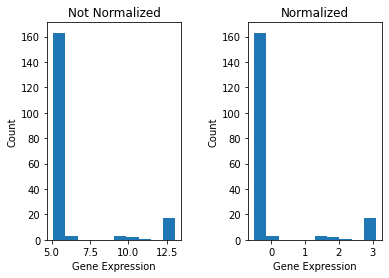

In [53]:
## Test if data are normalized

fig, axs = plt.subplots(1,2)

arr = np.array(feather_df['1431_at'])
axs[0].hist(arr)
axs[0].set(xlabel='Gene Expression', ylabel='Count', title='Not Normalized')

norm_arr = (arr-np.mean(arr))/np.std(arr)
axs[1].hist(norm_arr)
axs[1].set(xlabel='Gene Expression', ylabel='Count', title='Normalized')

plt.subplots_adjust(wspace=0.5)
plt.show()


In [34]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(feather_df)


In [47]:
print(list(set(tissues)))

tissue_classes = {'cerebellum':0, 
                   'placenta':1,
                   'kidney':2, 
                   'endometrium':3,
                   'liver':4,
                   'colon':5,
                   'hippocampus':6}

tissues = np.array([tissue_classes[tissue] for tissue in tissues])

print(tissues)

['cerebellum', 'placenta', 'kidney', 'endometrium', 'liver', 'colon', 'hippocampus']
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 2 2 2 4 4 4 2 2 2 4 4 4 2 2 0 6 4 4 4 4 4 4 0 0 4 4 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 1 1
 1 1 1 1]


(2, 189)


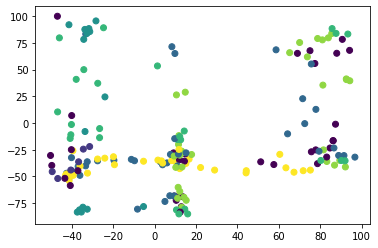

In [48]:
print(x_pca.shape)
x_pca = np.reshape(x_pca, (2,189))
plt.scatter(x_pca[0], x_pca[1], c=tissues)

plt.show()